In [91]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np


dataset = fetch_openml(data_id=187 , as_frame=True)
df = dataset.frame
df.head(5)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [92]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   class                           178 non-null    category
 1   Alcohol                         178 non-null    float64 
 2   Malic_acid                      178 non-null    float64 
 3   Ash                             178 non-null    float64 
 4   Alcalinity_of_ash               178 non-null    float64 
 5   Magnesium                       178 non-null    int64   
 6   Total_phenols                   178 non-null    float64 
 7   Flavanoids                      178 non-null    float64 
 8   Nonflavanoid_phenols            178 non-null    float64 
 9   Proanthocyanins                 178 non-null    float64 
 10  Color_intensity                 178 non-null    float64 
 11  Hue                             178 non-null    float64 
 12  OD280%2FOD315_of_dilut

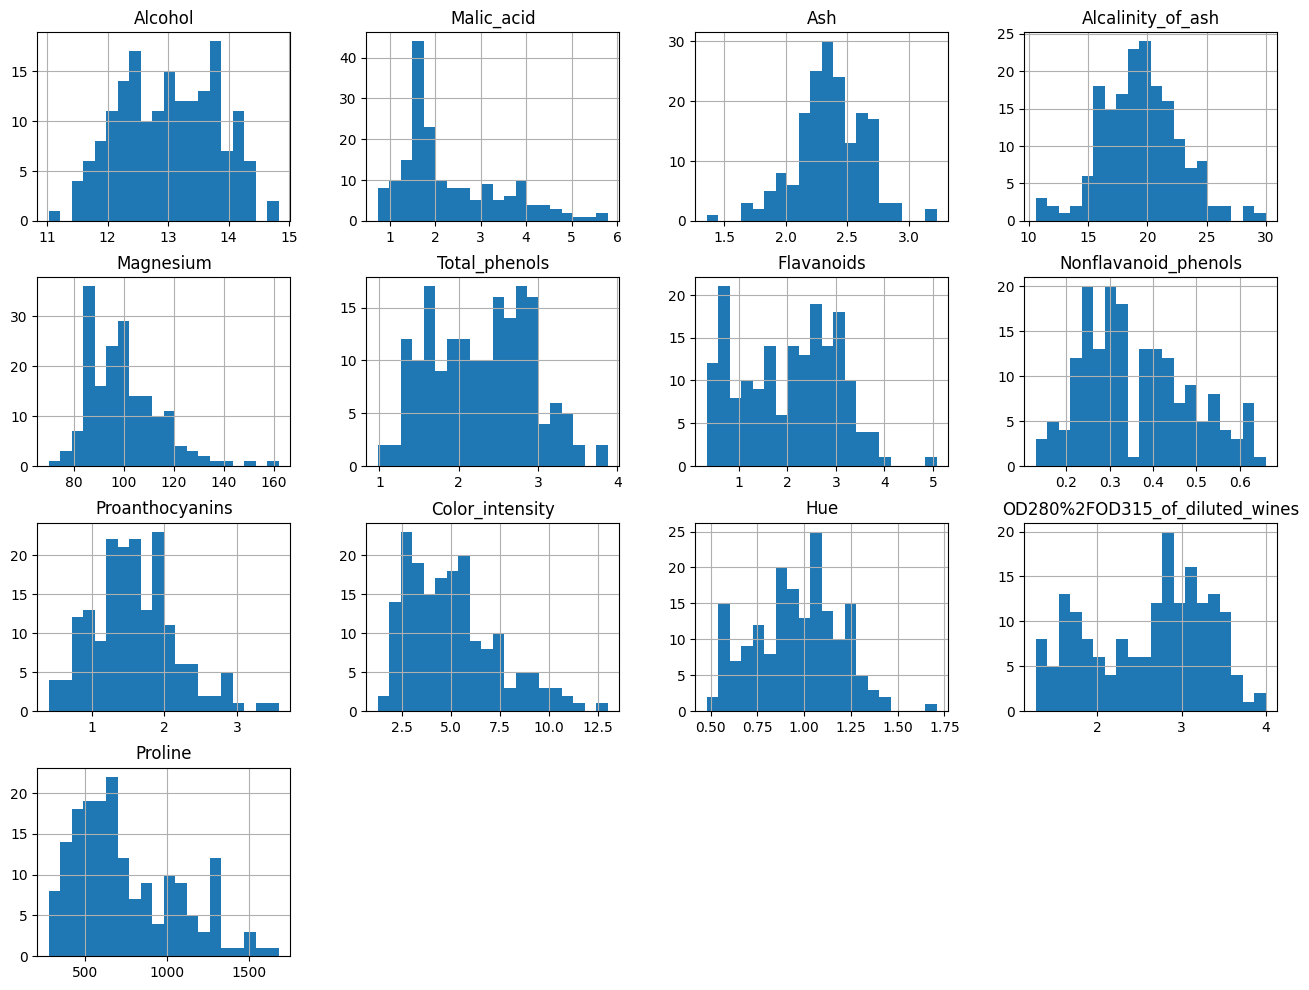

In [93]:
df.hist(bins = 20, figsize=(16, 12));

In [94]:
# حذف اوت لایر ها
features = df.drop(columns='class')

Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[outlier_mask]

Text(0.5, 1.0, 'Correlation Matrix')

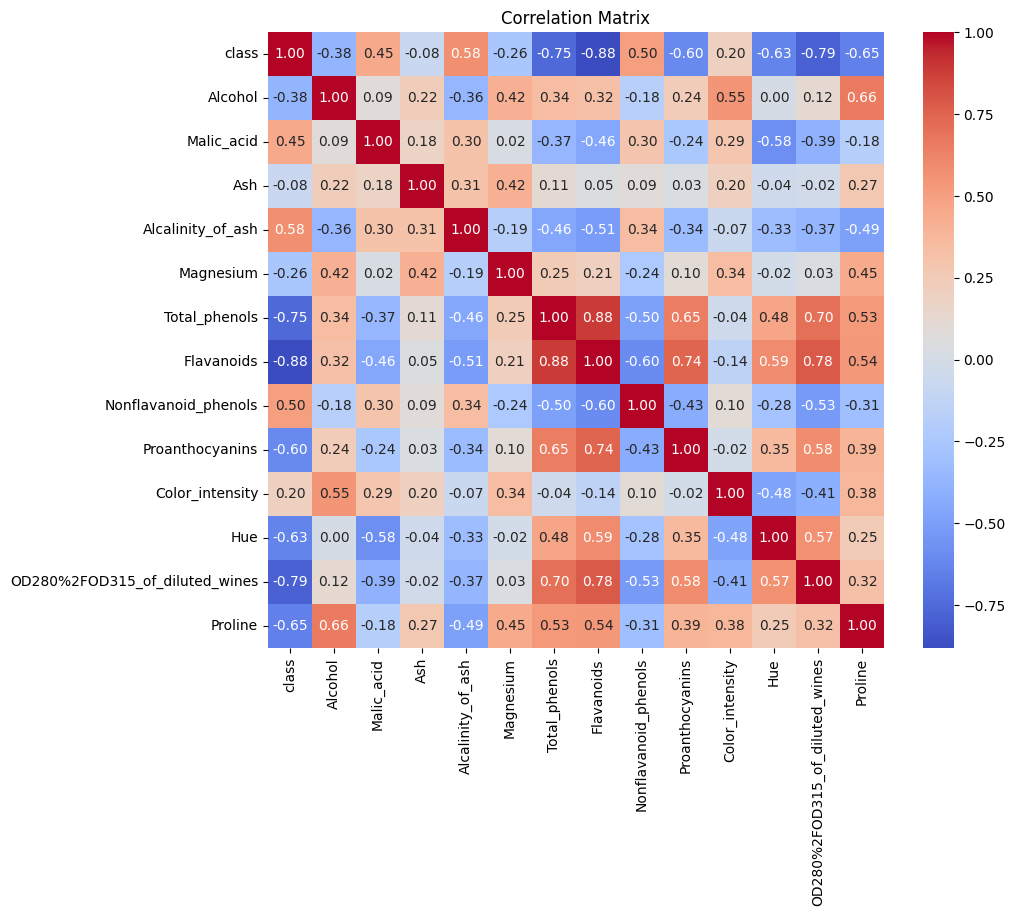

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# محاسبه ماتریس همبستگی
corr_matrix = df.corr()

# رسم heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")

In [96]:
df['class'].value_counts(normalize=True)


,proportion
class,
2,0.378882
1,0.360248
3,0.260870


In [97]:
x = df.drop(columns='class')
y = df['class'].astype(int)

In [98]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.2 , random_state=42 , stratify = y)

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', 'passthrough'),  # placeholder برای PCA یا LDA
    ('clf', LogisticRegression(max_iter=1000))
])

In [100]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold


param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [2, 3, 4, 5],
        'clf': [LogisticRegression(max_iter=1000)],
        'clf__C': [0.1, 1, 10]
    },
    {
        'reduce_dim': [LDA()],
        'reduce_dim__n_components': [1, 2],  # برای LDA حداکثر n_classes-1
        'clf': [LogisticRegression(max_iter=1000)],
        'clf__C': [0.1, 1, 10]
    },
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [2, 3, 4, 5],
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7]
    },
    {
        'reduce_dim': [LDA()],
        'reduce_dim__n_components': [1, 2],
        'clf': [KNeighborsClassifier()],
        'clf__n_neighbors': [3, 5, 7]
    }
]

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='r2',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)

grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('reduce_dim', 'passthrough'),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'clf': [LogisticRegression(max_iter=1000)],
                          'clf__C': [0.1, 1, 10], 'reduce_dim': [PCA()],
                          'reduce_dim__n_component...
                          'reduce_dim': [LinearDiscriminantAnalysis()],
                          'reduce_dim__n_components': [1, 2]},
                         {'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': [3, 5, 7], 'reduce_dim': [PCA()],
                          'reduce_dim__n_components': [2, 3, 4, 5]},
                         {'clf': [KNeighborsClassifier()],
                          'clf__n_neighbors': [3, 5, 7],
                          'reduce_dim': [LinearDiscriminantAnalysis()],
                          'reduce_dim__n_components': [1, 2]}],
             scoring='r2', verbose=2)

In [101]:
Best_parameters=grid_search.best_params_
best_model = grid_search.best_estimator_
Best_parameters

{'clf': LogisticRegression(max_iter=1000),
 'clf__C': 0.1,
 'reduce_dim': PCA(),
 'reduce_dim__n_components': 2}

In [102]:
y_pred = grid_search.predict(x_test)
y_proba = grid_search.predict_proba(x_test)

In [103]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

In [104]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
print("ROC AUC Score:", roc_auc)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       0.98      0.98      0.98        49
           3       0.97      0.97      0.97        34

    accuracy                           0.98       129
   macro avg       0.98      0.98      0.98       129
weighted avg       0.98      0.98      0.98       129

ROC AUC Score: 0.9991983635559487


Text(0.5, 1.0, 'Confusion Matrix')

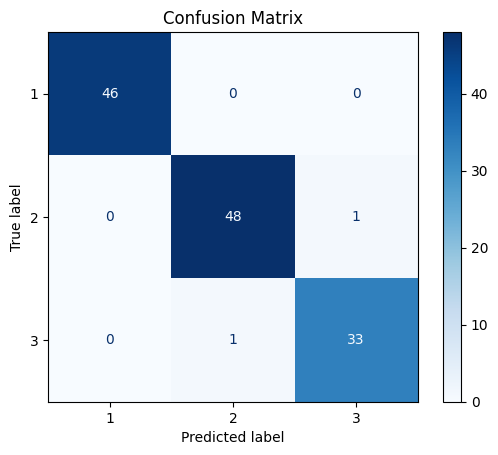

In [105]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')

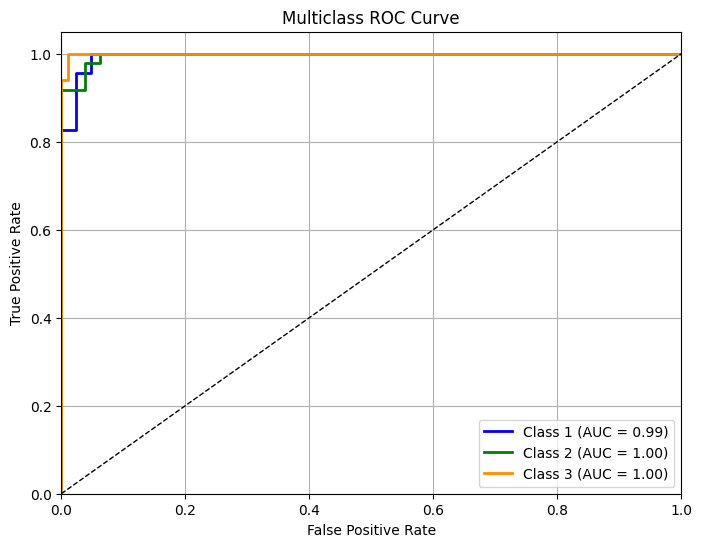

In [112]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

y_test_bin = label_binarize(y_test, classes=grid_search.classes_)
n_classes = y_test_bin.shape[1]

# احتمال‌ها به جای decision_function اگر نیاز بود:
y_score = grid_search.best_estimator_.decision_function(x_test)

# ROC per class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8,6))
colors = ['blue', 'green', 'darkorange']
for i, color in zip(range(n_classes), colors):
    true_class = grid_search.classes_[i]
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {true_class} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [111]:
print(np.unique(y))


[1 2 3]


In [107]:
from sklearn.metrics import accuracy_score

# پیش‌بینی
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# محاسبه دقت
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy : {test_acc:.3f}")

Train Accuracy: 1.000
Test Accuracy : 0.984


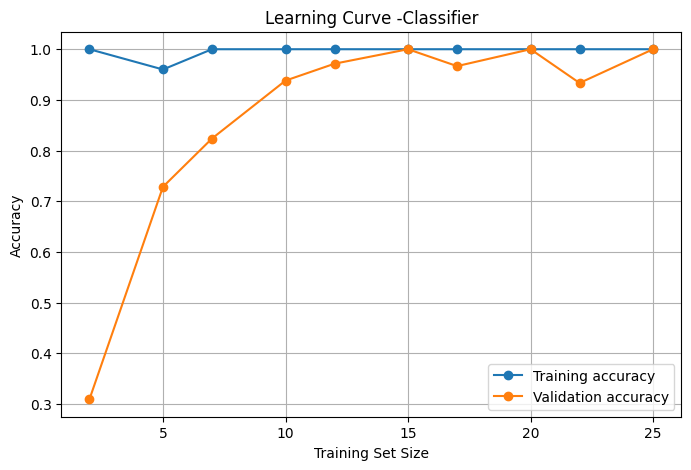

In [108]:

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# محاسبه learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=grid_search.best_estimator_,
    X=x_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# میانگین امتیازها
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# رسم نمودار
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', label='Validation accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve -Classifier')
plt.legend()
plt.grid(True)
plt.show()
